In [2]:
import sys
sys.path.insert(0, '/home/niell_lab/Documents/github/FreelyMovingEphys/')
from projects.ephys.population import Population
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

In [3]:
hffm = Population(savepath='/home/niell_lab/data/freely_moving_ephys/batch_files/021022/hffm')
hffm.load(fname='hffm_031822')
hffm.exptype = 'hffm'

reading from /home/niell_lab/data/freely_moving_ephys/batch_files/021022/hffm/hffm_031822.pickle


In [4]:
row = hffm.data.iloc[215]

In [6]:
stim = 'FmLt'
ind = 215

eyeT = row[stim+'_eyeT']
dEye = row[stim+'_dEye_dps']
dHead = row[stim+'_dHead']
dGaze = row[stim+'_dGaze']
spikeT = row[stim+'_spikeT']

# all eye movements
left = eyeT[(np.append(dEye, 0) > hffm.low_sacc_thresh)]
right = eyeT[(np.append(dEye, 0) < -hffm.low_sacc_thresh)]
# save saccade times
hffm.data.at[ind, stim+'_leftsacc_times'] = left.astype(object); hffm.data.at[ind, stim+'_rightsacc_times'] = right.astype(object)
# save neural activity around saccades
hffm.data.at[ind, stim+'_leftsacc_avg'] =  hffm.calc_psth(spikeT, left).astype(object)
hffm.data.at[ind, stim+'_rightsacc_avg'] =  hffm.calc_psth(spikeT, right).astype(object)

# all head movements
left = eyeT[(np.append(dHead, 0) > hffm.low_sacc_thresh)]
right = eyeT[(np.append(dHead, 0) < -hffm.low_sacc_thresh)]
# save saccade times
hffm.data.at[ind, stim+'_leftsacc_dHead_times'] = left.astype(object); hffm.data.at[ind, stim+'_rightsacc_dHead_times'] = right.astype(object)
# save neural activity around saccades
hffm.data.at[ind, stim+'_leftsacc_dHead_avg'] =  hffm.calc_psth(spikeT, left).astype(object)
hffm.data.at[ind, stim+'_rightsacc_dHead_avg'] =  hffm.calc_psth(spikeT, right).astype(object)

# gaze-shift dEye
left_gaze_dEye = eyeT[(np.append(dEye, 0) > hffm.high_sacc_thresh) & (np.append(dGaze,0) > hffm.high_sacc_thresh)]
right_gaze_dEye = eyeT[(np.append(dEye, 0) < -hffm.high_sacc_thresh) & (np.append(dGaze, 0) < -hffm.high_sacc_thresh)]
hffm.data.at[ind, stim+'_leftsacc_avg_gaze_shift_dEye_times'] = left_gaze_dEye.astype(object); hffm.data.at[ind, stim+'_rightsacc_avg_gaze_shift_dEye_times'] = right_gaze_dEye.astype(object)
hffm.data.at[ind, stim+'_leftsacc_avg_gaze_shift_dEye'] =  hffm.calc_psth(spikeT, left_gaze_dEye).astype(object)
hffm.data.at[ind, stim+'_rightsacc_avg_gaze_shift_dEye'] =  hffm.calc_psth(spikeT, right_gaze_dEye).astype(object)

# comp dEye
left_comp_dEye = eyeT[(np.append(dEye, 0) > hffm.low_sacc_thresh) & (np.append(dGaze, 0) < hffm.gaze_sacc_thresh)]
right_comp_dEye = eyeT[(np.append(dEye, 0) < -hffm.low_sacc_thresh) & (np.append(dGaze, 0) > -hffm.gaze_sacc_thresh)]
left_comp_dEye = hffm.apply_win_to_comp_sacc(left_comp_dEye, left_gaze_dEye)
right_comp_dEye = hffm.apply_win_to_comp_sacc(right_comp_dEye, right_gaze_dEye)
hffm.data.at[ind, stim+'_leftsacc_avg_comp_dEye_times'] = left_comp_dEye.astype(object); hffm.data.at[ind, stim+'_rightsacc_avg_comp_dEye_times'] = right_comp_dEye.astype(object)
hffm.data.at[ind, stim+'_leftsacc_avg_comp_dEye'] =  hffm.calc_psth(spikeT, left_comp_dEye).astype(object)
hffm.data.at[ind, stim+'_rightsacc_avg_comp_dEye'] =  hffm.calc_psth(spikeT, right_comp_dEye).astype(object)

# gaze-shift dHead
left_gaze_dHead = eyeT[(np.append(dHead, 0) > hffm.low_sacc_thresh) & (np.append(dGaze, 0) > hffm.low_sacc_thresh)]
right_gaze_dHead = eyeT[(np.append(dHead, 0) < -hffm.low_sacc_thresh) & (np.append(dGaze, 0) < -hffm.low_sacc_thresh)]
hffm.data.at[ind, stim+'_leftsacc_avg_gaze_shift_dHead_times'] = left_gaze_dHead.astype(object); hffm.data.at[ind, stim+'_rightsacc_avg_gaze_shift_dHead_times'] = right_gaze_dHead.astype(object)
hffm.data.at[ind, stim+'_leftsacc_avg_gaze_shift_dHead'] =  hffm.calc_psth(spikeT, left_gaze_dHead).astype(object)
hffm.data.at[ind, stim+'_rightsacc_avg_gaze_shift_dHead'] =  hffm.calc_psth(spikeT, right_gaze_dHead).astype(object)

# comp dHead
left_comp_dHead = eyeT[(np.append(dHead,0) > hffm.low_sacc_thresh) & (np.append(dGaze, 0) < hffm.gaze_sacc_thresh)]
right_comp_dHead = eyeT[(np.append(dHead,0) < -hffm.low_sacc_thresh) & (np.append(dGaze,0) > -hffm.gaze_sacc_thresh)]
left_comp_dHead = hffm.apply_win_to_comp_sacc(left_comp_dHead, left_gaze_dHead)
right_comp_dHead = hffm.apply_win_to_comp_sacc(right_comp_dHead, right_gaze_dHead)
hffm.data.at[ind, stim+'_leftsacc_avg_comp_dHead_times'] = left_comp_dHead.astype(object); hffm.data.at[ind, stim+'_rightsacc_avg_comp_dHead_times'] = right_comp_dHead.astype(object)
hffm.data.at[ind, stim+'_leftsacc_avg_comp_dHead'] =  hffm.calc_psth(spikeT, left_comp_dHead).astype(object)
hffm.data.at[ind, stim+'_rightsacc_avg_comp_dHead'] =  hffm.calc_psth(spikeT, right_comp_dHead).astype(object)

In [169]:
trange = np.arange(-1,1+0.001,0.001)

In [173]:
trange[15]

-0.985

In [174]:
0.001*15

0.015

In [7]:
row = hffm.data.iloc[215]

In [8]:
eventT = row['FmLt_leftsacc_avg_gaze_shift_dHead_times'].copy()
spikeT = row['FmLt_spikeT'].copy()

In [168]:
10/1000

0.01

In [175]:
win = 1
edgedrop = 15/1000
resample_size = 0.001
np.arange(-win-edgedrop, win+edgedrop+resample_size, resample_size)

array([-1.015, -1.014, -1.013, ...,  1.013,  1.014,  1.015])

In [ ]:
def kde_sdf(spikeT, eventT, bandwidth=10, resample_size=1, edgedrop=15, win=1000):
    """
    bandwidth (in msec)
    resample_size (msec)
    edgedrop (msec to drop at the start and end of the window so eliminate artifacts of filtering)
    win = 1000msec before and after
    """
    # some conversions
    bandwidth = bandwith/1000 # msec to sec
    resample_size = resample_size/1000 # msec to sec
    win = win/1000 # msec to sec
    edgedrop = edgedrop/1000
    edgedrop_ind = edgedrop/resample_size
    
    # setup time bins
    bins = np.arange(-win-edgedrop, win+edgedrop+resample_size, resample_size)
    
    # get timestamp of spikes relative to events in eventT
    sps = []
    for i, t in enumerate(eventT):
        sp = spikeT-t
        sp = sp[(sp <= (win+edgedrop)) & (sp >= (-win-edgedrop))] # only keep spikes in this window
        sps.extend(sp)
    sps = np.array(sps) # all values in here are between -1 and 1
    
    # kernel density estimation
    kernel = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(sps[:,np.newaxis])
    density = kernel.score_samples(bins[:,np.newaxis])
    sdf = np.exp(sdf)*(np.size(sps)/np.size(eventT)) # convert back to spike rate
    sdf = sdf[edgedrop_ind:-edgedrop_ind]
    
    return bins, sdf

In [ ]:
def calc_sdf(right, left, label):
    """ Calculate spike density function for all units in a recording.
    """
    
        
        fig = plt.subplots(np.ceil(self.n_cells/7).astype('int'), 7, figsize=(35,np.int(np.ceil(self.n_cells/3))), dpi=50)
        for i, ind in enumerate(self.cells.index):
            for s in np.array(right):
                hist, _ = np.histogram(self.cells.at[ind,'spikeT']-s, self.trange)
                rightavg[i,:] = rightavg[i,:] + hist / (right.size*np.diff(self.trange))
            for s in np.array(left):
                hist, _ = np.histogram(self.cells.at[ind,'spikeT']-s, self.trange)
                leftavg[i,:] = leftavg[i,:]+ hist/(left.size*np.diff(self.trange))
            plt.subplot(np.ceil(self.n_cells/7).astype('int'), 7, i+1)
            plt.plot(self.trange_x, rightavg[i,:], color='tab:blue')
            plt.plot(self.trange_x, leftavg[i,:], color='tab:red')
            maxval = np.max(np.maximum(rightavg[i,:], leftavg[i,:]))
            plt.vlines(0, 0, maxval*1.5, linestyles='dotted', colors='k')
            plt.xlim([-0.5, 0.5])
            plt.ylim([0, maxval*1.2])
            plt.ylabel('sp/sec')
            plt.xlabel('sec')
            plt.title(str(ind)+' '+label)
        plt.tight_layout()
        if self.figs_in_pdf:
            self.detail_pdf.savefig(); plt.close()
        elif not self.figs_in_pdf:
            plt.show()
        return rightavg, leftavg

In [ ]:
def plotSDF1():

In [161]:
def plotSDF_rec():

In [162]:
np.max(row['FmLt_leftsacc_avg_gaze_shift_dHead'])

12.486365094642139

In [163]:
np.max(np.exp(sdf[10:-10])*(n_spikes/n_sacc))

12.58141679977459

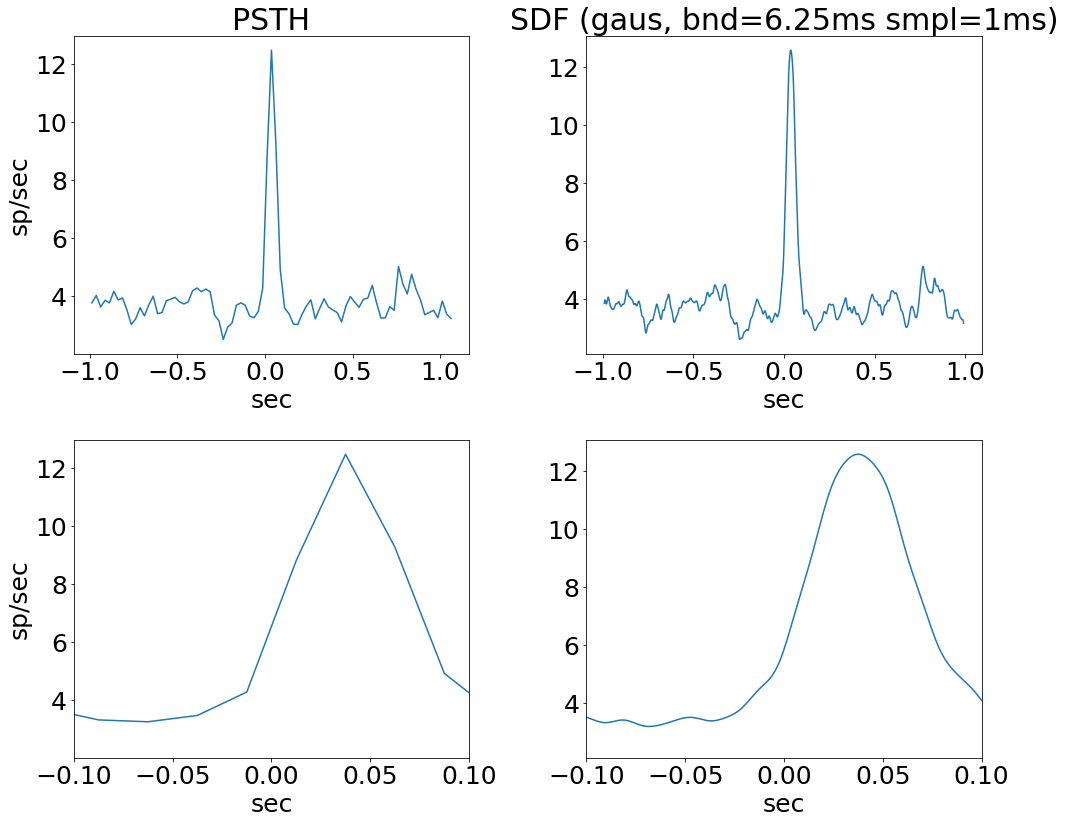

In [164]:
plt.subplots(2,2,figsize=(15,12))

plt.subplot(221)
plt.plot(hffm.trange_x, row['FmLt_leftsacc_avg_gaze_shift_dHead'])
plt.title('PSTH')
plt.xlabel('sec')
plt.ylabel('sp/sec')
# plt.xlim([-0.1,0.1])

plt.subplot(222)
plt.plot(trange[10:-10], np.exp(sdf[10:-10])*(n_spikes/n_sacc))
plt.title('SDF (gaus, bnd=6.25ms smpl=1ms)')
plt.xlabel('sec')
# plt.xlim([-0.1,0.1])

plt.subplot(223)
plt.plot(hffm.trange_x, row['FmLt_leftsacc_avg_gaze_shift_dHead'])
# plt.title('PSTH')
plt.xlabel('sec')
plt.ylabel('sp/sec')
plt.xlim([-0.1,0.1])

plt.subplot(224)
plt.plot(trange[10:-10], np.exp(sdf[10:-10])*(n_spikes/n_sacc))
# plt.title('SDF (bndwdth=25ms resmpl=1ms)')
plt.xlabel('sec')
plt.xlim([-0.1,0.1])

plt.tight_layout()

In [108]:
n_spikes = np.size(sps)
samp_inter = 0.001
n_sacc = np.size(eventT)

array([3.49053577, 3.63169714, 3.73435996, ..., 3.25954443, 3.24671158,
       3.25954443])

In [98]:
a = np.size(eventT)
b = np.size(trange)
c = 0.001
d = 0.0125

In [103]:
np.size(sps)

24599

In [61]:
np.size(eventT,0)*0.001

3.117

In [59]:
np.size(trange)

2025

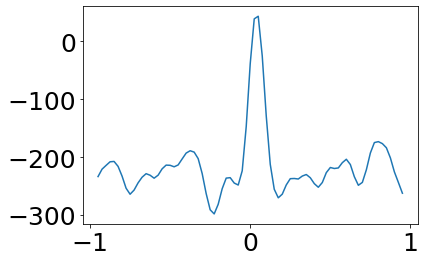

In [25]:
plt.plot(trange[2:-3], sdf[2:-3]*(np.size(sps)/np.size(trange)))

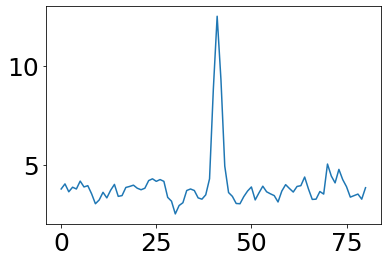

In [65]:
plt.plot(np.sum(kde_input,0))

In [120]:
xplot = np.linspace(-5, 10, 1000)[:, np.newaxis]
N = 20
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))
)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

In [125]:
X.shape

(20, 1)

In [122]:
xplot.shape

(1000, 1)

In [123]:
bins.shape

(10,)

In [105]:
sdf.shape

(81,)

In [106]:
sphist = sdf*np.size(kde_input,0)

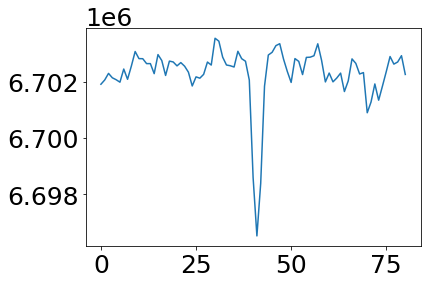

In [107]:
plt.plot(sphist)

In [87]:
from scipy.stats import gaussian_kde

In [90]:
kernel = gaussian_kde(kde_input.T)

In [98]:
kde_in = kde_input.T

In [103]:
kde = gaussian_kde(kde_in, bw_method=0.2 / kde_in.std(ddof=1))
kde.evaluate(trange[:-1,np.newaxis])

array([1.32190457e-84])

In [75]:
np.argmax(sdf)

30

In [11]:
def calc_psth(spikeT, eventT):
    psth = np.zeros(hffm.trange.size-1)
    kde_input = np.zeros([eventT.size, hffm.trange.size-1])
    for i, t in enumerate(eventT):
        x, _ = np.histogram(spikeT-t, hffm.trange)
        kde_input[i,:] = x / np.diff(hffm.trange)
    
#     kde = KernelDensity(kernel='gaussian', bandwidth=0.2)
#     kde.fit(np.reshape(row['FmLt_rate'],[-1,1]))
#     sdf = kde.score_samples(psth,[-1,1]))
    return psth

psth = calc_psth(spikeT, movT)
plt.plot(psth)

In [9]:
i = 100; t = movT[i]
hist, _ = np.histogram(spikeT-t, hffm.trange)
hist / 

In [10]:
hist

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
sacc_sp = np.zeros([np.size(movT), np.size(hffm.trange)-1])
for i, t in enumerate(movT):
    sacc_sp[i,:], _ = np.histogram(spikeT-t, hffm.trange)

In [ ]:
plt.plot(row['FmLt_leftsacc_avg_gaze_shift_dHead'])

In [ ]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.2)
kde.fit(np.reshape(row['FmLt_rate'],[-1,1]))
density = kde.score_samples(np.reshape(row['FmLt_rate'],[-1,1]))
psth = hffm.calc_psth(density, row['FmLt_leftsacc_avg_gaze_shift_dHead_times'])

In [ ]:
psth

In [ ]:
movements = np.zeros([np.size(movT), np.size(hffm.trange)-1])
for i, t in enumerate(movT):
    movements[i,:], _ = np.histogram(spikeT-t, hffm.trange)

In [ ]:
density = kde.score_samples(movements)

In [ ]:
density.shape

In [ ]:
plt.plot(density)

In [ ]:
def calc_kde_psth():
    psth = np.zeros(self.trange.size-1)
    for s in np.array(eventT):
        hist, _ = np.histogram(spikeT-s, self.trange)
        psth = psth + hist / (eventT.size*np.diff(self.trange))
    return psth

In [ ]:
hffm.summarize_population()

In [ ]:
hffm.save(fname='hffm_040622', savedir='/home/niell_lab/data/freely_moving_ephys/batch_files/040622')

In [ ]:
ltdk = Population(savepath='/home/niell_lab/data/freely_moving_ephys/batch_files/021022/ltdk')
ltdk.load(fname='ltdk_031822')
ltdk.exptype = 'ltdk'

In [ ]:
ltdk.summarize_population()

In [ ]:
hffm.save(fname='ltdk_040622', savedir='/home/niell_lab/data/freely_moving_ephys/batch_files/040622')